In [1]:
import numpy as np
import pandas as pd
odf=pd.read_csv('players_21.csv')
df=odf[['sofifa_id','short_name','age','height_cm','weight_kg','league_name','league_rank','overall','potential','value_eur','wage_eur','international_reputation',
        'power_stamina','power_strength','skill_moves','work_rate']].copy()
df.head(10)
df.shape

(18944, 16)

In [2]:
df.iloc[0:10,0:5]

,sofifa_id,short_name,age,height_cm,weight_kg
0,158023,L. Messi,33,170,72
1,20801,Cristiano Ronaldo,35,187,83
2,200389,J. Oblak,27,188,87
3,188545,R. Lewandowski,31,184,80
4,190871,Neymar Jr,28,175,68
5,192985,K. De Bruyne,29,181,70
6,231747,K. Mbappé,21,178,73
7,192448,M. ter Stegen,28,187,85
8,203376,V. van Dijk,28,193,92
9,212831,Alisson,27,191,91


In [3]:
df.describe(include='all')

,sofifa_id,short_name,age,height_cm,weight_kg,league_name,league_rank,overall,potential,value_eur,wage_eur,international_reputation,power_stamina,power_strength,skill_moves,work_rate
count,18944.000000,18944,18944.000000,18944.000000,18944.000000,18719,18719.000000,18944.000000,18944.000000,1.894400e+04,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944
unique,NaN,17884,NaN,NaN,NaN,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
top,NaN,J. Rodríguez,NaN,NaN,NaN,English League Championship,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium/Medium
freq,NaN,13,NaN,NaN,NaN,709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9980
mean,226242.402872,NaN,25.225823,181.190773,75.016892,NaN,1.357070,65.677787,71.086729,2.224813e+06,8675.852513,1.091850,62.596020,64.742927,2.363017,NaN
std,27171.091056,NaN,4.697354,6.825672,7.057140,NaN,0.739327,7.002278,6.109985,5.102486e+06,19654.774894,0.361841,15.878793,12.519775,0.766469,NaN
min,41.000000,NaN,16.000000,155.000000,50.000000,NaN,1.000000,47.000000,47.000000,0.000000e+00,0.000000,1.000000,12.000000,16.000000,1.000000,NaN
25%,210030.500000,NaN,21.000000,176.000000,70.000000,NaN,1.000000,61.000000,67.000000,3.000000e+05,1000.000000,1.000000,55.000000,57.000000,2.000000,NaN
50%,232314.500000,NaN,25.000000,181.000000,75.000000,NaN,1.000000,66.000000,71.000000,6.500000e+05,3000.000000,1.000000,66.000000,66.000000,2.000000,NaN
75%,246760.250000,NaN,29.000000,186.000000,80.000000,NaN,1.000000,70.000000,75.000000,1.800000e+06,7000.000000,1.000000,73.000000,74.000000,3.000000,NaN


## Data Cleaning

In [4]:
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [5]:
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [6]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [7]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [8]:
df_conti_vars = df.loc[:, (df.dtypes == 'float64') | (df.dtypes == 'int64')]
df_cat_vars = df.loc[:, (df.dtypes == 'object')]

In [9]:
df_conti_vars.apply(continuous_var_summary).T.round(2)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
sofifa_id,18944.0,0.0,4.285936e+09,226242.40,232314.5,27171.09,7.382682e+08,41.0,147834.03,178567.6,190120.6,210030.5,232314.5,246760.25,255397.7,257275.85,258628.14,258970.0
age,18944.0,0.0,4.778780e+05,25.23,25.0,4.70,2.207000e+01,16.0,17.00,18.0,19.0,21.0,25.0,29.00,32.0,33.00,37.00,53.0
height_cm,18944.0,0.0,3.432478e+06,181.19,181.0,6.83,4.659000e+01,155.0,166.00,170.0,172.0,176.0,181.0,186.00,190.0,192.00,196.00,206.0
weight_kg,18944.0,0.0,1.421120e+06,75.02,75.0,7.06,4.980000e+01,50.0,60.00,64.0,66.0,70.0,75.0,80.00,84.0,87.00,92.00,110.0
league_rank,18719.0,225.0,2.540300e+04,1.36,1.0,0.74,5.500000e-01,1.0,1.00,1.0,1.0,1.0,1.0,1.00,2.0,3.00,4.00,4.0
overall,18944.0,0.0,1.244200e+06,65.68,66.0,7.00,4.903000e+01,47.0,50.00,54.0,57.0,61.0,66.0,70.00,75.0,77.00,83.00,93.0
potential,18944.0,0.0,1.346667e+06,71.09,71.0,6.11,3.733000e+01,47.0,58.00,62.0,64.0,67.0,71.0,75.00,79.0,82.00,86.00,95.0
value_eur,18944.0,0.0,4.214686e+10,2224813.29,650000.0,5102485.99,2.603536e+13,0.0,0.00,80000.0,130000.0,300000.0,650000.0,1800000.00,6000000.0,9500000.00,24500000.00,105500000.0
wage_eur,18944.0,0.0,1.643554e+08,8675.85,3000.0,19654.77,3.863102e+08,0.0,0.00,500.0,500.0,1000.0,3000.0,7000.00,21000.0,37000.00,91570.00,560000.0
international_reputation,18944.0,0.0,2.068400e+04,1.09,1.0,0.36,1.300000e-01,1.0,1.00,1.0,1.0,1.0,1.0,1.00,1.0,2.00,3.00,5.0


In [10]:
df_cat_vars.apply(categorical_var_summary).T

,N,NMISS,MODE,FREQ,PERCENT
short_name,18944,0,J. Rodríguez,13,0.07
league_name,18719,225,English League Championship,709,3.79
work_rate,18944,0,Medium/Medium,9980,52.68


### Outlier Treatment

In [11]:
df_conti_vars = df_conti_vars.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))
df_conti_vars.apply(continuous_var_summary).T.round(2)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
sofifa_id,18944.0,0.0,4.293198e+09,226625.75,232314.5,25357.02,6.429787e+08,147834.03,147839.18,178567.6,190120.6,210030.5,232314.5,246760.25,255397.7,257275.85,258627.65,258628.14
age,18944.0,0.0,4.776740e+05,25.22,25.0,4.66,2.170000e+01,17.00,17.00,18.0,19.0,21.0,25.0,29.00,32.0,33.00,37.00,37.00
height_cm,18944.0,0.0,3.432540e+06,181.19,181.0,6.73,4.532000e+01,166.00,166.00,170.0,172.0,176.0,181.0,186.00,190.0,192.00,196.00,196.00
weight_kg,18944.0,0.0,1.420833e+06,75.00,75.0,6.91,4.779000e+01,60.00,60.00,64.0,66.0,70.0,75.0,80.00,84.0,87.00,92.00,92.00
league_rank,18719.0,225.0,2.540300e+04,1.36,1.0,0.74,5.500000e-01,1.00,1.00,1.0,1.0,1.0,1.0,1.00,2.0,3.00,4.00,4.00
overall,18944.0,0.0,1.243985e+06,65.67,66.0,6.92,4.782000e+01,50.00,50.00,54.0,57.0,61.0,66.0,70.00,75.0,77.00,83.00,83.00
potential,18944.0,0.0,1.346718e+06,71.09,71.0,5.98,3.580000e+01,58.00,58.00,62.0,64.0,67.0,71.0,75.00,79.0,82.00,86.00,86.00
value_eur,18944.0,0.0,3.938436e+10,2078988.76,650000.0,3890390.27,1.513514e+13,0.00,0.00,80000.0,130000.0,300000.0,650000.0,1800000.00,6000000.0,9500000.00,24500000.00,24500000.00
wage_eur,18944.0,0.0,1.536266e+08,8109.51,3000.0,14743.26,2.173638e+08,0.00,0.00,500.0,500.0,1000.0,3000.0,7000.00,21000.0,37000.00,91324.90,91570.00
international_reputation,18944.0,0.0,2.062900e+04,1.09,1.0,0.34,1.200000e-01,1.00,1.00,1.0,1.0,1.0,1.0,1.00,1.0,2.00,3.00,3.00


### Missing Value Treatment

In [12]:
df_conti_vars = df_conti_vars.apply(missing_imputation)
df_cat_vars = df_cat_vars.apply(missing_imputation)
df_conti_vars.apply(continuous_var_summary).T.round(1)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
sofifa_id,18944.0,0.0,4.293198e+09,226625.7,232314.5,25357.0,6.429787e+08,147834.0,147839.2,178567.6,190120.6,210030.5,232314.5,246760.2,255397.7,257275.8,258627.6,258628.1
age,18944.0,0.0,4.776740e+05,25.2,25.0,4.7,2.170000e+01,17.0,17.0,18.0,19.0,21.0,25.0,29.0,32.0,33.0,37.0,37.0
height_cm,18944.0,0.0,3.432540e+06,181.2,181.0,6.7,4.530000e+01,166.0,166.0,170.0,172.0,176.0,181.0,186.0,190.0,192.0,196.0,196.0
weight_kg,18944.0,0.0,1.420833e+06,75.0,75.0,6.9,4.780000e+01,60.0,60.0,64.0,66.0,70.0,75.0,80.0,84.0,87.0,92.0,92.0
league_rank,18944.0,0.0,2.570830e+04,1.4,1.0,0.7,5.000000e-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,4.0,4.0
overall,18944.0,0.0,1.243985e+06,65.7,66.0,6.9,4.780000e+01,50.0,50.0,54.0,57.0,61.0,66.0,70.0,75.0,77.0,83.0,83.0
potential,18944.0,0.0,1.346718e+06,71.1,71.0,6.0,3.580000e+01,58.0,58.0,62.0,64.0,67.0,71.0,75.0,79.0,82.0,86.0,86.0
value_eur,18944.0,0.0,3.938436e+10,2078988.8,650000.0,3890390.3,1.513514e+13,0.0,0.0,80000.0,130000.0,300000.0,650000.0,1800000.0,6000000.0,9500000.0,24500000.0,24500000.0
wage_eur,18944.0,0.0,1.536266e+08,8109.5,3000.0,14743.3,2.173638e+08,0.0,0.0,500.0,500.0,1000.0,3000.0,7000.0,21000.0,37000.0,91324.9,91570.0
international_reputation,18944.0,0.0,2.062900e+04,1.1,1.0,0.3,1.000000e-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0


In [13]:
df_cat_vars = df[['league_name', 'work_rate']]

for c_feature in ['league_name', 'work_rate']:
    df_cat_vars[c_feature] = df_cat_vars[c_feature].astype('category')
    df_cat_vars = create_dummies(df_cat_vars, c_feature)

C:\Users\HTC\AppData\Local\Temp\ipykernel_12128\4179482304.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_vars[c_feature] = df_cat_vars[c_feature].astype('category')


In [14]:
df_new = pd.concat([df_conti_vars, df_cat_vars], axis = 1)
df_new

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,...,league_name_Uruguayan Primera División,league_name_Venezuelan Primera División,work_rate_High/Low,work_rate_High/Medium,work_rate_Low/High,work_rate_Low/Low,work_rate_Low/Medium,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium
0,158023.00,33.0,170.0,72.0,1.0,83.0,86.0,24500000.0,91570,3.0,...,0,0,0,0,0,0,0,0,1,0
1,147834.03,35.0,187.0,83.0,1.0,83.0,86.0,24500000.0,91570,3.0,...,0,0,1,0,0,0,0,0,0,0
2,200389.00,27.0,188.0,87.0,1.0,83.0,86.0,24500000.0,91570,3.0,...,0,0,0,0,0,0,0,0,0,1
3,188545.00,31.0,184.0,80.0,1.0,83.0,86.0,24500000.0,91570,3.0,...,0,0,0,1,0,0,0,0,0,0
4,190871.00,28.0,175.0,68.0,1.0,83.0,86.0,24500000.0,91570,3.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,256679.00,24.0,176.0,73.0,1.0,50.0,58.0,40000.0,500,1.0,...,0,0,0,0,0,0,0,0,0,1
18940,257710.00,21.0,177.0,70.0,1.0,50.0,58.0,35000.0,1000,1.0,...,0,0,0,0,0,1,0,0,0,0
18941,250989.00,20.0,185.0,74.0,1.0,50.0,58.0,35000.0,1000,1.0,...,0,0,0,0,0,0,1,0,0,0
18942,257697.00,23.0,186.0,80.0,1.0,50.0,58.0,40000.0,1000,1.0,...,0,0,0,0,0,1,0,0,0,0


C:\Users\HTC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


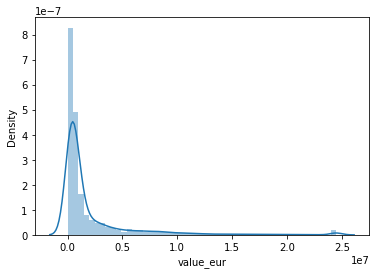

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df_new.value_eur)
plt.show()

C:\Users\HTC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


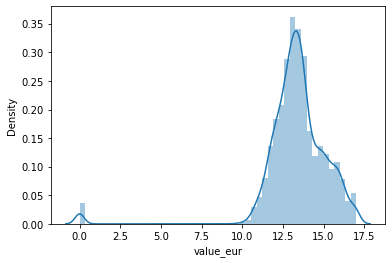

In [16]:
# apply log transformation: log is rescalling the data and making the distribution normal
df_new['value_eur'] = np.log(df_new['value_eur']+1)

# Distribution of variables
sns.distplot(df_new.value_eur)
plt.show()

## scaling of dataset

In [17]:
from sklearn.preprocessing import StandardScaler

# Separate Target Variable and Predictor Variables
TargetVariable=['value_eur']
 
X=df_new.drop(columns=['value_eur'])
y=df_new[TargetVariable].values
 
### Sandardization of data ###
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13260, 71)
(13260, 1)
(5684, 71)
(5684, 1)


In [20]:
# Installing required libraries
#!pip install tensorflow
#!pip install keras

In [21]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer 
model.add(Dense(units=5, input_dim=71, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
663/663 [==============================] - 3s 2ms/step - loss: 0.6384
Epoch 2/50
663/663 [==============================] - 1s 2ms/step - loss: 0.4268
Epoch 3/50
663/663 [==============================] - 2s 2ms/step - loss: 0.3710
Epoch 4/50
663/663 [==============================] - 2s 3ms/step - loss: 0.3079
Epoch 5/50
663/663 [==============================] - 2s 2ms/step - loss: 0.2279
Epoch 6/50
663/663 [==============================] - 1s 2ms/step - loss: 0.1591
Epoch 7/50
663/663 [==============================] - 2s 2ms/step - loss: 0.1132
Epoch 8/50
663/663 [==============================] - 2s 3ms/step - loss: 0.0825
Epoch 9/50
663/663 [==============================] - 2s 3ms/step - loss: 0.0651
Epoch 10/50
663/663 [==============================] - 2s 2ms/step - loss: 0.0550
Epoch 11/50
663/663 [==============================] - 2s 3ms/step - loss: 0.0493
Epoch 12/50
663/663 [==============================] - 1s 2ms/step - loss: 0.0447
Epoch 13/50
663/663 [====

In [22]:
predictors=pd.DataFrame(data=df_new,columns=df_new.drop(columns='value_eur').columns)

In [23]:
# Generating Predictions on testing data
Predictions=model.predict(X_test)
 
# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
TestingData=pd.DataFrame(data=Test_Data, columns=predictors.columns)
TestingData['Value']=y_test_orig
TestingData['PredictedValue']=Predictions
TestingData.head(10)

178/178 [==============================] - 1s 4ms/step


,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,power_stamina,...,work_rate_High/Low,work_rate_High/Medium,work_rate_Low/High,work_rate_Low/Low,work_rate_Low/Medium,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium,Value,PredictedValue
0,251178.00,21.0,182.0,72.0,1.0,60.0,70.0,900.0,1.0,62.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.611541,12.714847
1,230416.00,32.0,187.0,86.0,1.0,64.0,64.0,3000.0,1.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.611541,12.071598
2,253069.00,31.0,183.0,68.0,1.0,58.0,58.0,2000.0,1.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.289794,11.498268
3,176137.00,31.0,183.0,79.0,1.0,71.0,71.0,11000.0,2.0,72.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,14.557448,14.182487
4,231954.00,26.0,179.0,70.0,1.0,62.0,67.0,4000.0,1.0,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.765691,12.750648
5,183284.00,35.0,184.0,77.0,2.0,70.0,70.0,3000.0,3.0,34.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.217675,14.108295
6,258628.14,18.0,190.0,84.0,2.0,57.0,72.0,500.0,1.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.100718,12.367398
7,211365.00,25.0,183.0,75.0,1.0,72.0,75.0,6000.0,1.0,77.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15.176487,15.098992
8,183475.00,30.0,185.0,82.0,1.0,72.0,72.0,11000.0,1.0,34.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.557448,14.252275
9,206534.00,26.0,185.0,71.0,1.0,71.0,72.0,56000.0,1.0,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.845130,14.933526


In [24]:
#print(TestingData.head(10))
#TestingData.drop(columns='Name',inplace=True)
print(TestingData.iloc[0:10,0:12])
print(TestingData.iloc[0:10,71:73])


   sofifa_id   age  height_cm  weight_kg  league_rank  overall  potential  \
0  251178.00  21.0      182.0       72.0          1.0     60.0       70.0   
1  230416.00  32.0      187.0       86.0          1.0     64.0       64.0   
2  253069.00  31.0      183.0       68.0          1.0     58.0       58.0   
3  176137.00  31.0      183.0       79.0          1.0     71.0       71.0   
4  231954.00  26.0      179.0       70.0          1.0     62.0       67.0   
5  183284.00  35.0      184.0       77.0          2.0     70.0       70.0   
6  258628.14  18.0      190.0       84.0          2.0     57.0       72.0   
7  211365.00  25.0      183.0       75.0          1.0     72.0       75.0   
8  183475.00  30.0      185.0       82.0          1.0     72.0       72.0   
9  206534.00  26.0      185.0       71.0          1.0     71.0       72.0   

   wage_eur  international_reputation  power_stamina  power_strength  \
0     900.0                       1.0           62.0            73.0   
1    300

In [25]:
convert_dict = {'sofifa_id': int}
TestingData = TestingData.astype(convert_dict)
TestingData.head(5)

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,wage_eur,international_reputation,power_stamina,...,work_rate_High/Low,work_rate_High/Medium,work_rate_Low/High,work_rate_Low/Low,work_rate_Low/Medium,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium,Value,PredictedValue
0,251178,21.0,182.0,72.0,1.0,60.0,70.0,900.0,1.0,62.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.611541,12.714847
1,230416,32.0,187.0,86.0,1.0,64.0,64.0,3000.0,1.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.611541,12.071598
2,253069,31.0,183.0,68.0,1.0,58.0,58.0,2000.0,1.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.289794,11.498268
3,176137,31.0,183.0,79.0,1.0,71.0,71.0,11000.0,2.0,72.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,14.557448,14.182487
4,231954,26.0,179.0,70.0,1.0,62.0,67.0,4000.0,1.0,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.765691,12.750648


In [26]:
name=[]
for p in TestingData['sofifa_id']:
    all = df.loc[df['sofifa_id'] == p, 'short_name'].values
    name.append(all)
    
namedf=pd.DataFrame({'Name':name})

In [27]:
result=pd.DataFrame({'sofifa_id':TestingData['sofifa_id'],'Name':namedf['Name'],'age':TestingData['age'],'Height':TestingData['height_cm'],'Weight':TestingData['weight_kg'],
                    'LeagueRank':TestingData['league_rank'],'overall':TestingData['overall'],'potential':TestingData['potential'],
                    'Wage_eur':TestingData['wage_eur'],'reputation':TestingData['international_reputation'],'stamina':TestingData['power_stamina'],
                    'strength':TestingData['power_strength'],'skills':TestingData['skill_moves'],'scaled_value':TestingData['Value'],
                    'predicted_scaled_value':TestingData['PredictedValue']})

result.head(20)

,sofifa_id,Name,age,Height,Weight,LeagueRank,overall,potential,Wage_eur,reputation,stamina,strength,skills,scaled_value,predicted_scaled_value
0,251178,[T. Grivosti],21.0,182.0,72.0,1.0,60.0,70.0,900.0,1.0,62.0,73.0,2.0,12.611541,12.714847
1,230416,[Vasquão Junior],32.0,187.0,86.0,1.0,64.0,64.0,3000.0,1.0,35.0,87.0,2.0,12.611541,12.071598
2,253069,[M. Al Hassawi],31.0,183.0,68.0,1.0,58.0,58.0,2000.0,1.0,26.0,57.0,1.0,11.289794,11.498268
3,176137,[J. Vossen],31.0,183.0,79.0,1.0,71.0,71.0,11000.0,2.0,72.0,68.0,3.0,14.557448,14.182487
4,231954,[Xu Xin],26.0,179.0,70.0,1.0,62.0,67.0,4000.0,1.0,68.0,74.0,2.0,12.765691,12.750648
5,183284,[A. Chedjou],35.0,184.0,77.0,2.0,70.0,70.0,3000.0,3.0,34.0,70.0,2.0,13.217675,14.108295
6,258628,[],18.0,190.0,84.0,2.0,57.0,72.0,500.0,1.0,20.0,66.0,1.0,12.100718,12.367398
7,211365,[E. Hestad],25.0,183.0,75.0,1.0,72.0,75.0,6000.0,1.0,77.0,67.0,4.0,15.176487,15.098992
8,183475,[S. Grytebust],30.0,185.0,82.0,1.0,72.0,72.0,11000.0,1.0,34.0,57.0,1.0,14.557448,14.252275
9,206534,[P. Bamford],26.0,185.0,71.0,1.0,71.0,72.0,56000.0,1.0,81.0,72.0,3.0,14.845130,14.933526


In [28]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print('Accuracy of the model is',r2_score(y_test_orig,Predictions))
print('MSE',mean_squared_error(y_test_orig,Predictions))
print('MAE',mean_absolute_error(y_test_orig,Predictions))

Accuracy of the model is 0.9443987107203394
MSE 0.23586662602530986
MAE 0.18472951580926847


## Final Result

In [44]:
fresult=pd.DataFrame({'Name':result['Name'],'Actual':result['scaled_value'],'Predicted':result['predicted_scaled_value']})
fresult['Actual']=np.exp(fresult['Actual'])
fresult['Predicted']=np.exp(fresult['Predicted'])
fresult=fresult.astype({'Actual':int,'Predicted':int})

fresult

,Name,Actual,Predicted
0,[T. Grivosti],300000,332650
1,[Vasquão Junior],300000,174835
2,[M. Al Hassawi],80001,98544
3,[J. Vossen],2100001,1443364
4,[Xu Xin],350000,344775
...,...,...,...
5679,[M. Jenz],150001,225963
5680,[S. Allagbé],1700000,1365967
5681,[S. Mohamed],300000,283050
5682,[S. Rosales],950001,1116522


In [58]:
TestingData = TestingData.drop(TestingData[TestingData.Value < 1].index)

<AxesSubplot:xlabel='Value', ylabel='PredictedValue'>

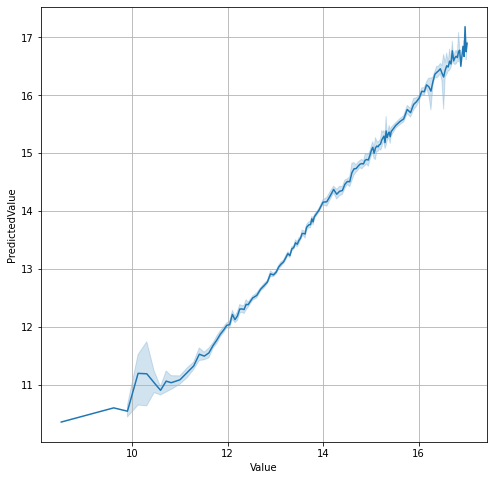

In [60]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)
plt.rcParams['axes.grid'] = True
sns.lineplot(x=TestingData['Value'],y=TestingData['PredictedValue'])